In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df = pd.read_csv("Delinquency_prediction_dataset.csv")



In [25]:
# Basic info about dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

# First 5 rows
df.head()

# Check datatypes
df.info()


Dataset Shape: (500, 19)

Column Names:
 ['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Delinquent_Account', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure', 'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9  

In [26]:
# Missing values
print("\nMissing Values per Column:\n", df.isnull().sum())

# Percentage of missing values
(df.isnull().sum() / len(df)) * 100

# Check duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())



Missing Values per Column:
 Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64

Number of Duplicate Rows: 0


In [27]:
# Numerical columns summary
df.describe().T

# Categorical columns summary
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Customer_ID:
Customer_ID
CUST0500    1
CUST0001    1
CUST0002    1
CUST0003    1
CUST0484    1
           ..
CUST0009    1
CUST0008    1
CUST0007    1
CUST0006    1
CUST0005    1
Name: count, Length: 500, dtype: int64

Value counts for Employment_Status:
Employment_Status
Unemployed       93
retired          87
Employed         82
EMP              81
Self-employed    80
employed         77
Name: count, dtype: int64

Value counts for Credit_Card_Type:
Credit_Card_Type
Gold        118
Student     112
Business    108
Standard     86
Platinum     76
Name: count, dtype: int64

Value counts for Location:
Location
Los Angeles    107
Phoenix        103
Chicago        103
Houston         95
New York        92
Name: count, dtype: int64

Value counts for Month_1:
Month_1
On-time    177
Missed     164
Late       159
Name: count, dtype: int64

Value counts for Month_2:
Month_2
Late       173
Missed     167
On-time    160
Name: count, dtype: int64

Value counts for Month_3:
Month_3

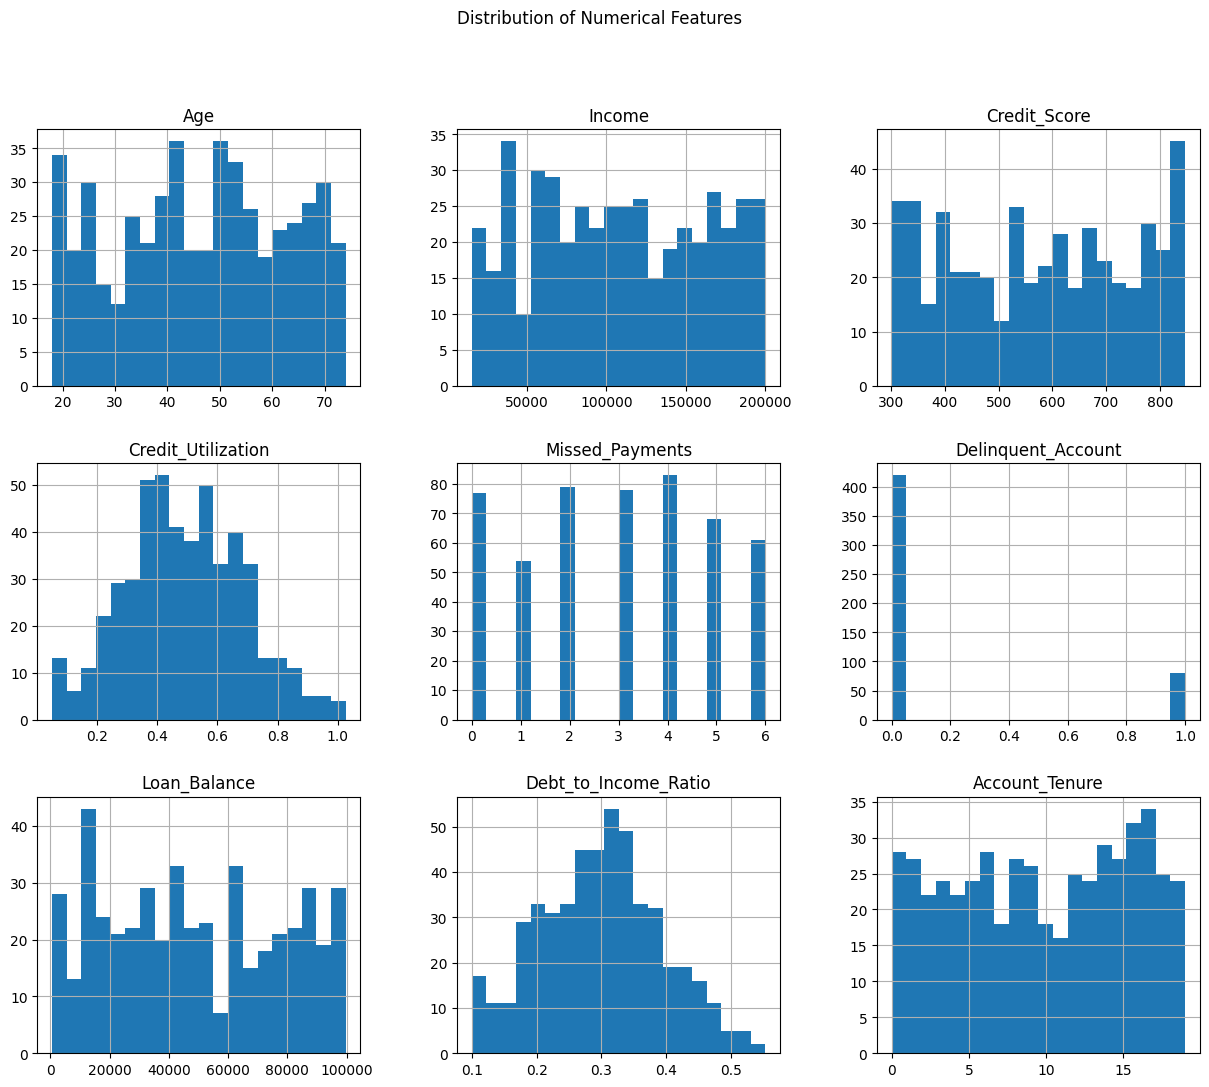

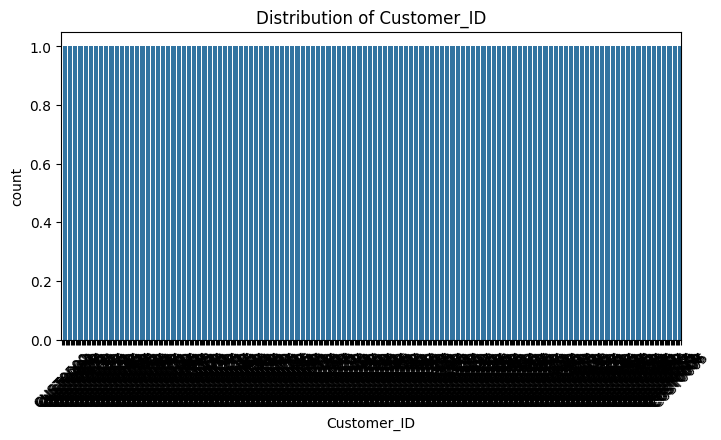

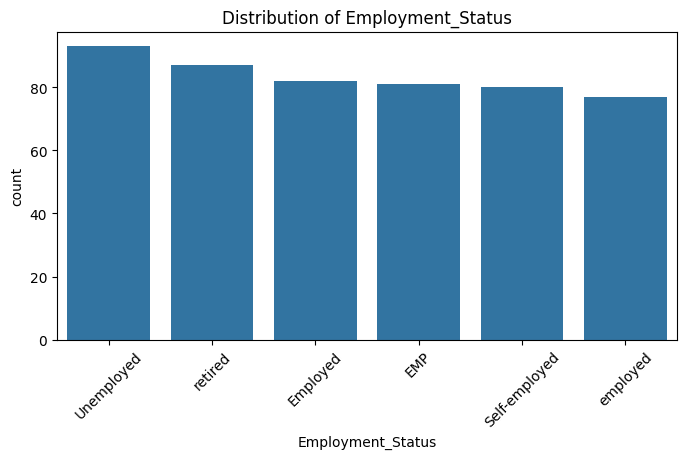

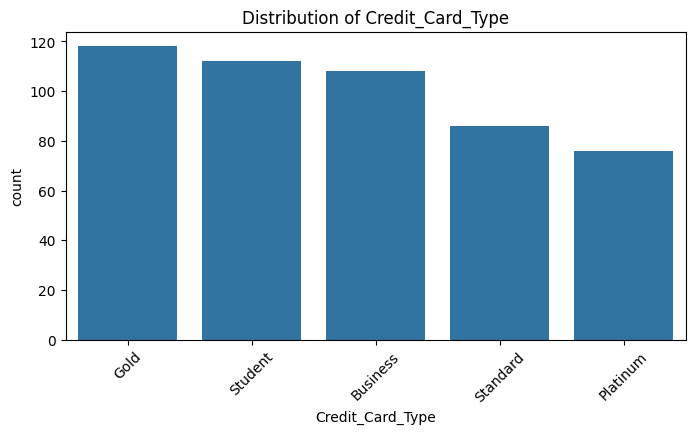

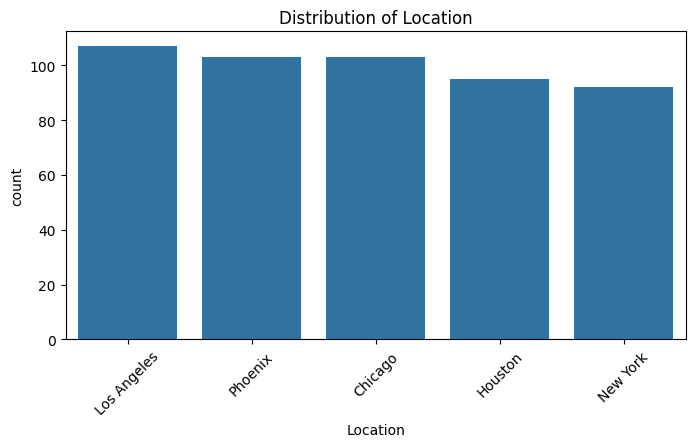

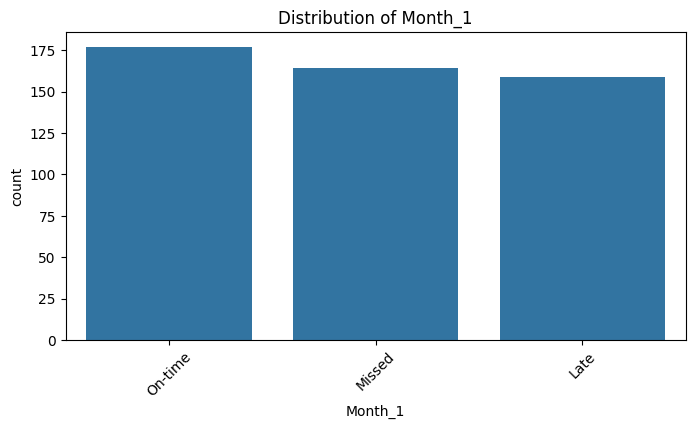

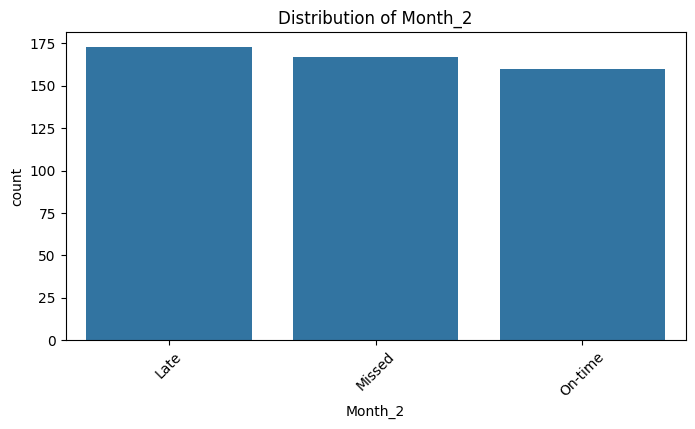

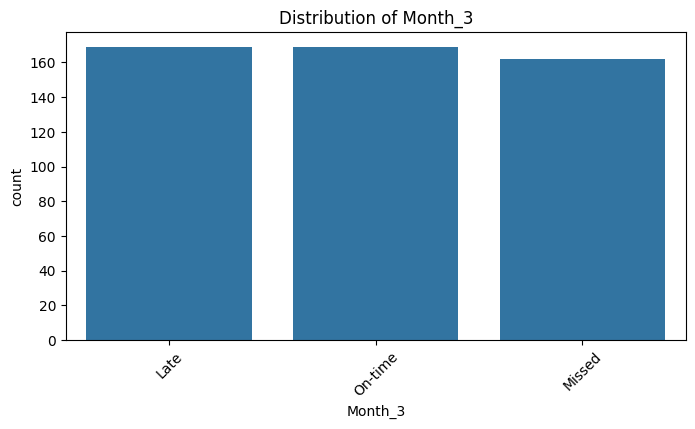

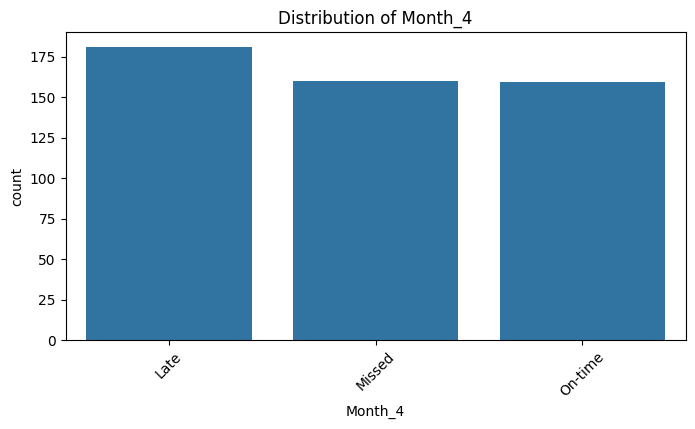

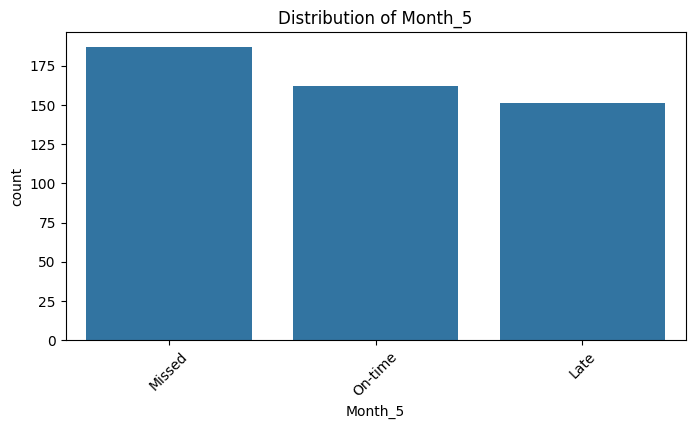

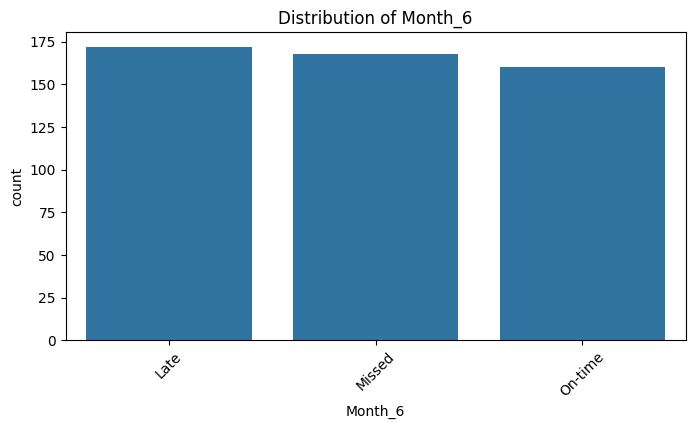

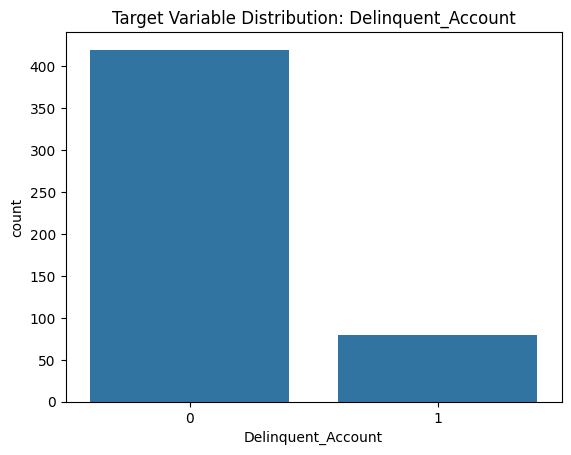

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(bins=20, figsize=(15,12))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Count plot for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Target variable distribution
sns.countplot(data=df, x="Delinquent_Account")
plt.title("Target Variable Distribution: Delinquent_Account")
plt.show()


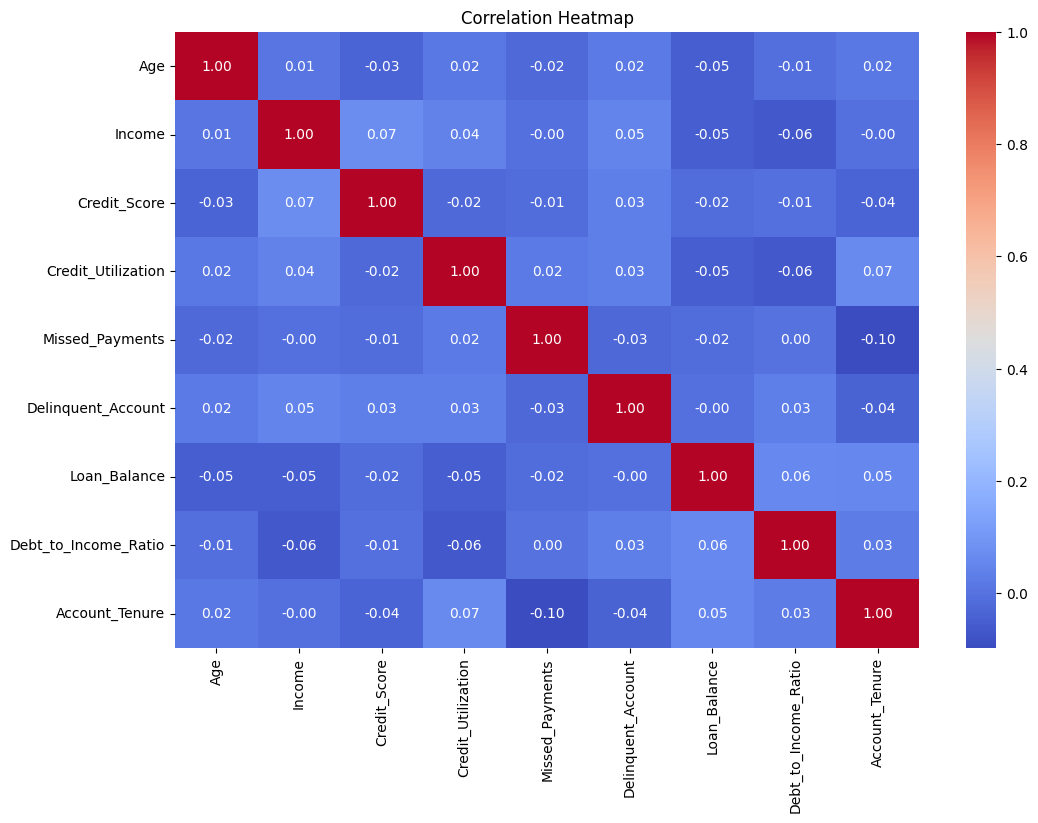

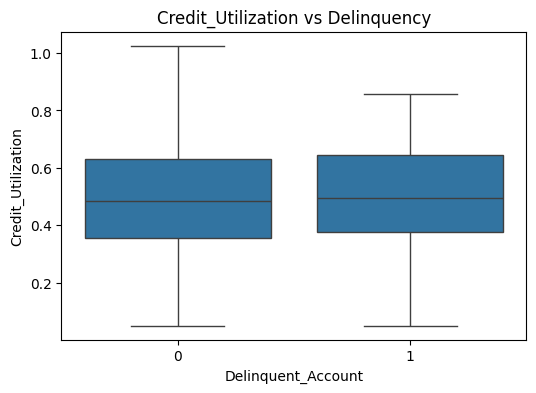

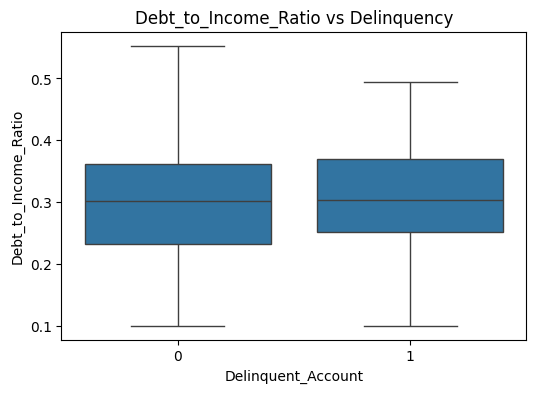

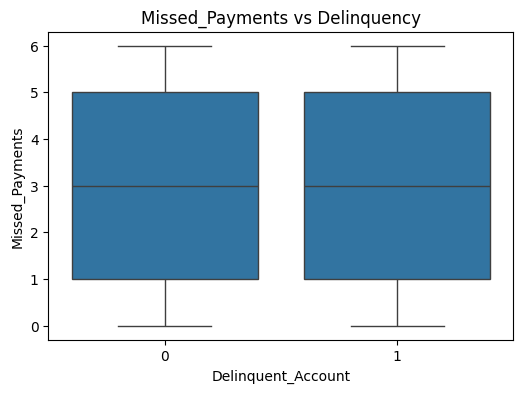

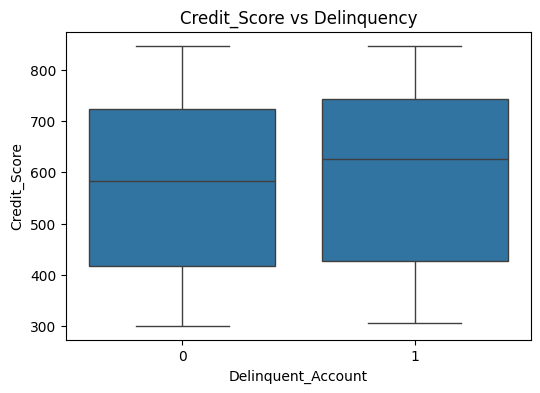

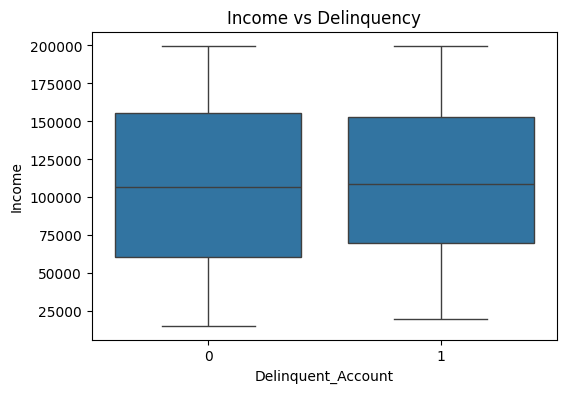

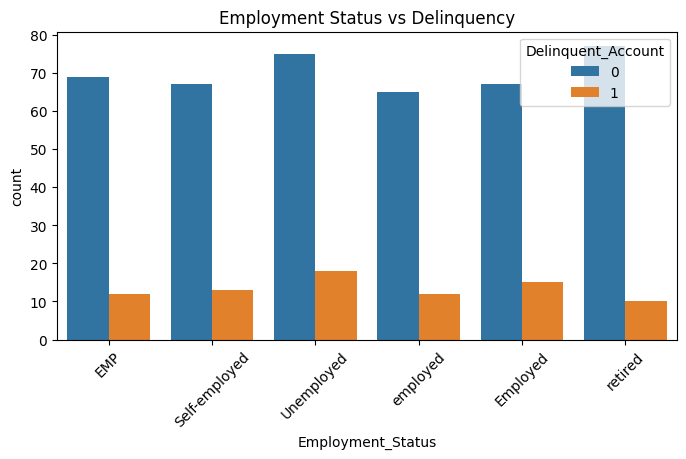

In [29]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Relationship of key factors with Delinquency
key_features = ["Credit_Utilization", "Debt_to_Income_Ratio", "Missed_Payments", "Credit_Score", "Income"]
for col in key_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Delinquent_Account", y=col)
    plt.title(f"{col} vs Delinquency")
    plt.show()

# Employment Status vs Delinquency
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Employment_Status", hue="Delinquent_Account")
plt.title("Employment Status vs Delinquency")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Grouped averages by delinquency
risk_factors = ["Credit_Utilization", "Debt_to_Income_Ratio", "Credit_Score", "Income", "Missed_Payments"]
df.groupby("Delinquent_Account")[risk_factors].mean()


,Credit_Utilization,Debt_to_Income_Ratio,Credit_Score,Income,Missed_Payments
Delinquent_Account,,,,,
0,0.488505,0.297445,575.145933,107306.943005,2.990476
1,0.506887,0.306301,591.150000,113902.013333,2.850000


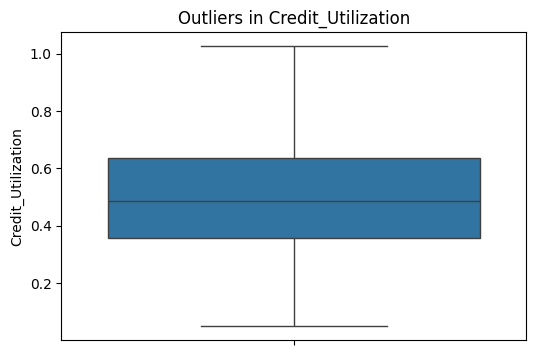

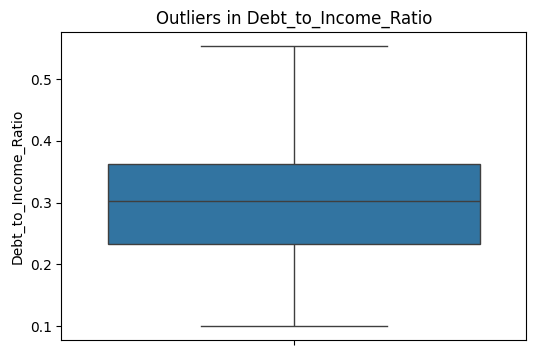

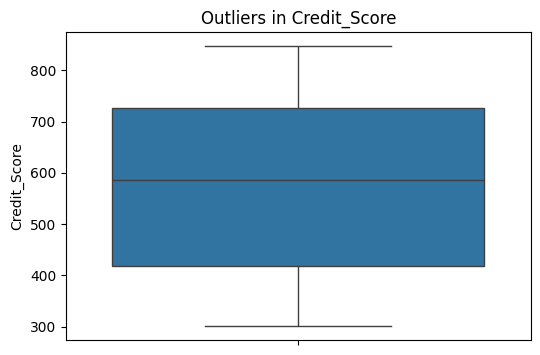

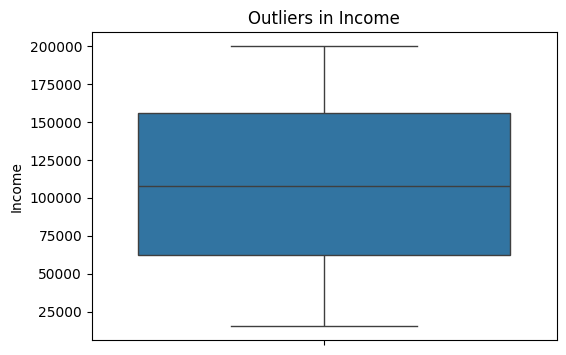

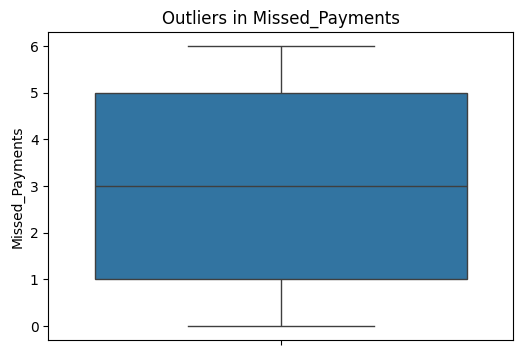

In [31]:
# Boxplots for numerical risk factors
for col in risk_factors:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, y=col)
    plt.title(f"Outliers in {col}")
    plt.show()


In [32]:
# 1. Dataset shape (number of records & columns)
print("Dataset Shape:", df.shape)

# 2. Data types and non-null counts
print("\n--- Data Info ---")
print(df.info())

# 3. Preview first 5 rows
print("\n--- Sample Data ---")
print(df.head())

# 4. Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# 5. Summary statistics (for numerical columns)
print("\n--- Summary Statistics ---")
print(df.describe().T)

# 6. Count categorical variable unique values (for key columns)
categorical_cols = df.select_dtypes(include=['object']).columns
print("\n--- Unique Values per Categorical Column ---")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Dataset Shape: (500, 19)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-

In [33]:
# Missing values summary
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data


Income          39
Loan_Balance    29
Credit_Score     2
dtype: int64

In [34]:
# Correlation matrix (numerical only)
corr = df.corr(numeric_only=True)
corr['Delinquent_Account'].sort_values(ascending=False)

# Compare averages of key risk factors by delinquency status
risk_factors = ["Credit_Utilization", "Debt_to_Income_Ratio", "Credit_Score", "Income", "Missed_Payments"]
df.groupby("Delinquent_Account")[risk_factors].mean()


,Credit_Utilization,Debt_to_Income_Ratio,Credit_Score,Income,Missed_Payments
Delinquent_Account,,,,,
0,0.488505,0.297445,575.145933,107306.943005,2.990476
1,0.506887,0.306301,591.150000,113902.013333,2.850000


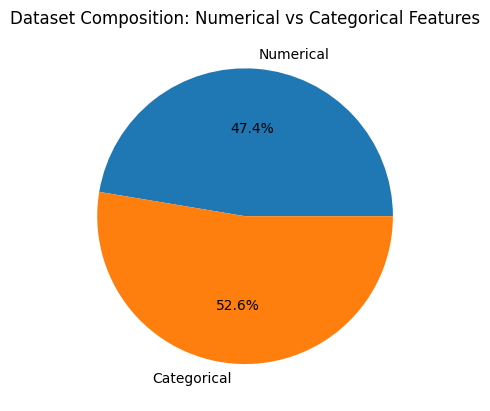

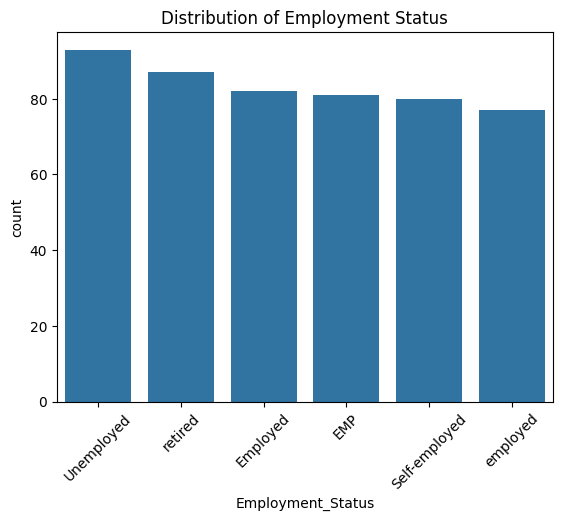

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart: categorical vs numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

plt.pie([len(num_cols), len(cat_cols)], labels=["Numerical","Categorical"], autopct='%1.1f%%')
plt.title("Dataset Composition: Numerical vs Categorical Features")
plt.show()

# Employment status distribution
sns.countplot(data=df, x="Employment_Status", order=df["Employment_Status"].value_counts().index)
plt.title("Distribution of Employment Status")
plt.xticks(rotation=45)
plt.show()


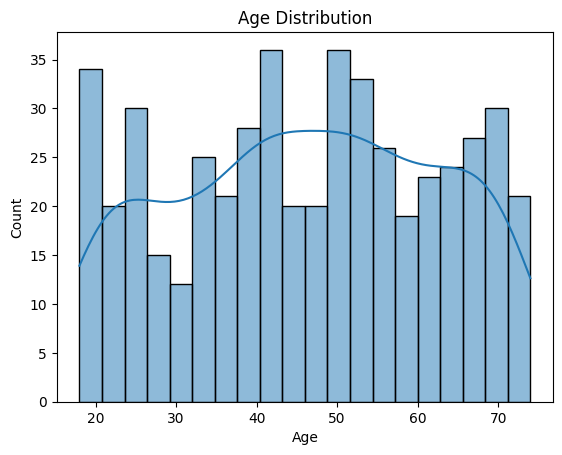

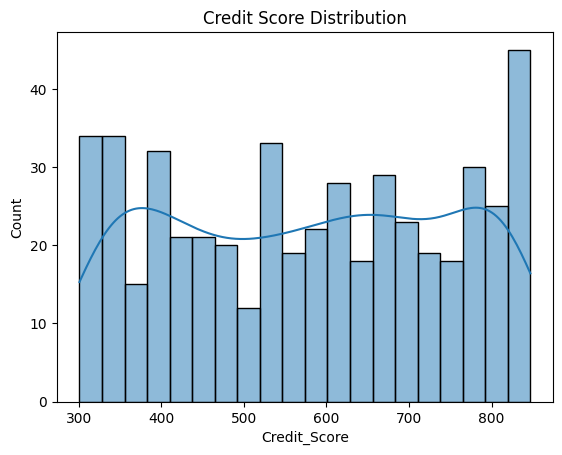

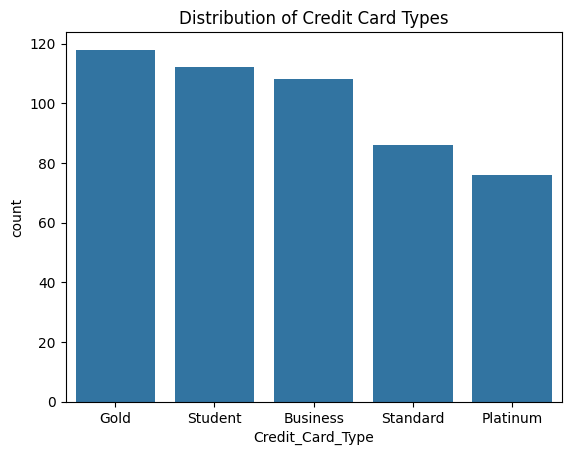

In [36]:
# Age distribution
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Credit Score distribution
sns.histplot(df["Credit_Score"], bins=20, kde=True)
plt.title("Credit Score Distribution")
plt.show()

# Credit Card Type counts
sns.countplot(data=df, x="Credit_Card_Type", order=df["Credit_Card_Type"].value_counts().index)
plt.title("Distribution of Credit Card Types")
plt.show()


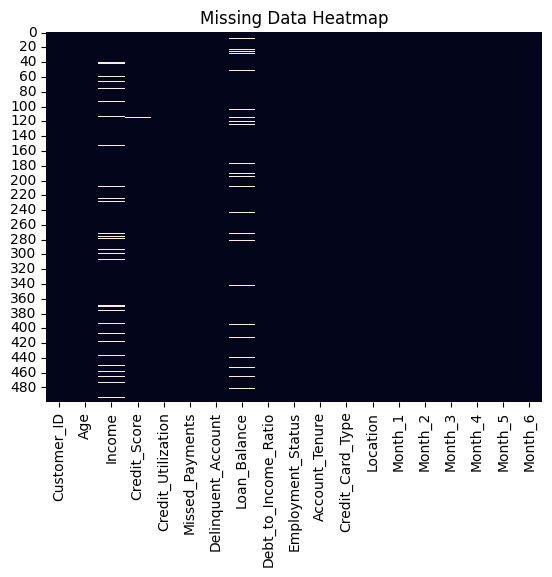

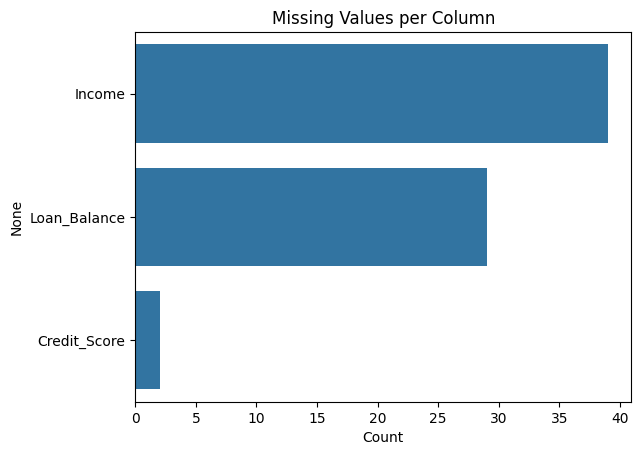

In [37]:
# Heatmap of missing data
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# Bar plot of missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Values per Column")
plt.xlabel("Count")
plt.show()


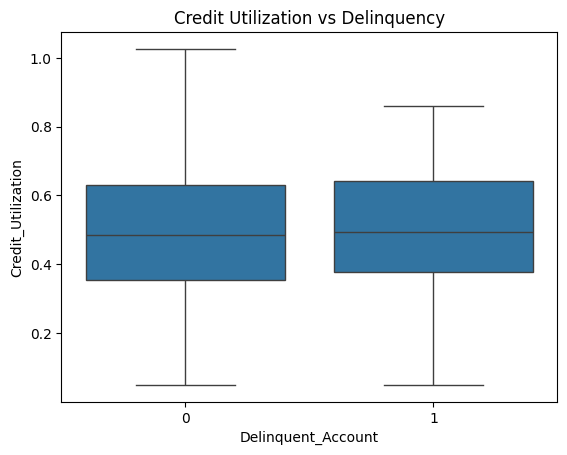

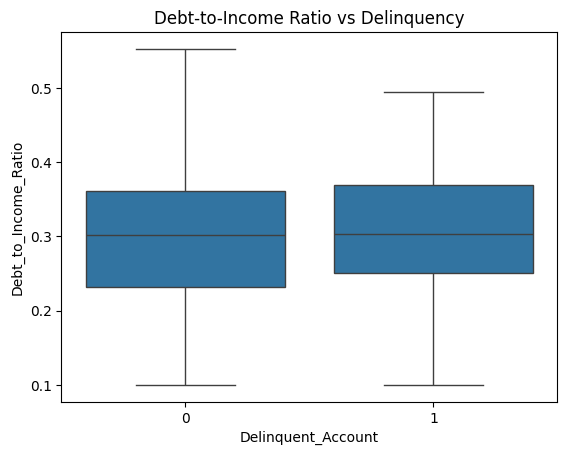

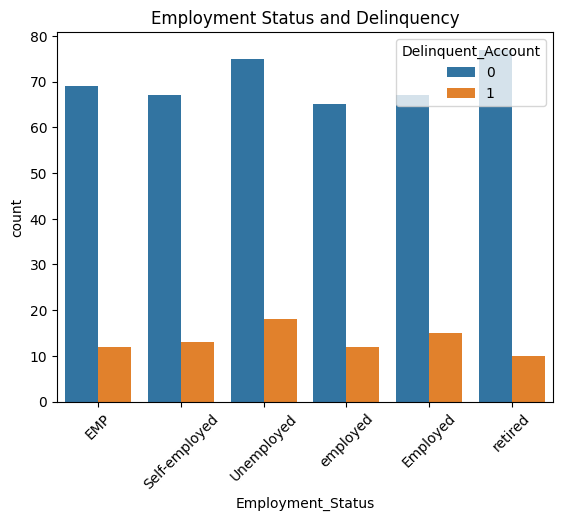

In [38]:
# Credit Utilization vs Delinquency
sns.boxplot(data=df, x="Delinquent_Account", y="Credit_Utilization")
plt.title("Credit Utilization vs Delinquency")
plt.show()

# Debt-to-Income Ratio vs Delinquency
sns.boxplot(data=df, x="Delinquent_Account", y="Debt_to_Income_Ratio")
plt.title("Debt-to-Income Ratio vs Delinquency")
plt.show()

# Employment Status vs Delinquency
sns.countplot(data=df, x="Employment_Status", hue="Delinquent_Account")
plt.title("Employment Status and Delinquency")
plt.xticks(rotation=45)
plt.show()


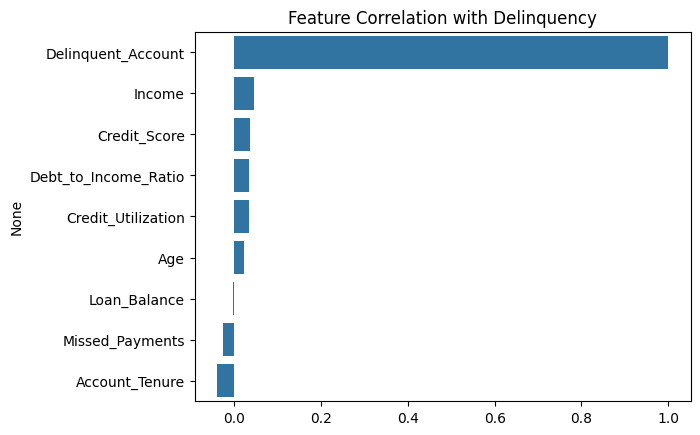

In [39]:
# Correlation with delinquency
corr = df.corr(numeric_only=True)["Delinquent_Account"].sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index)
plt.title("Feature Correlation with Delinquency")
plt.show()


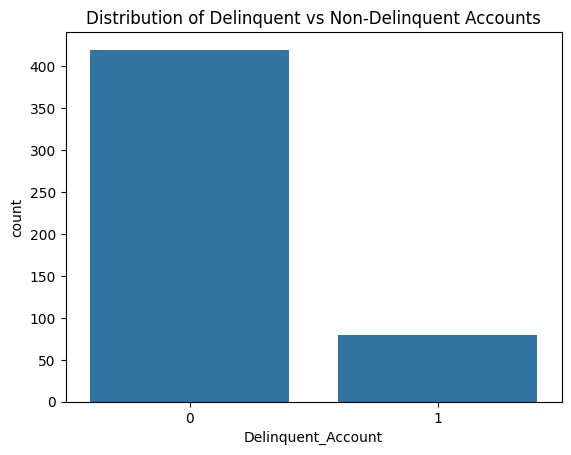

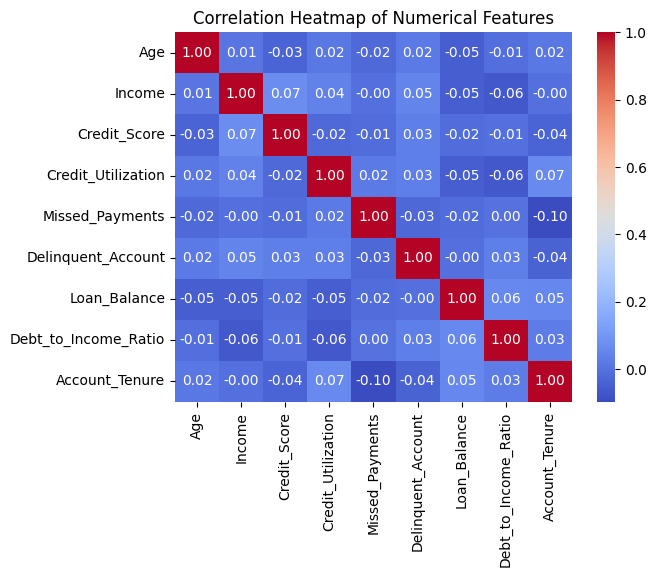

In [40]:
# Target variable distribution
sns.countplot(data=df, x="Delinquent_Account")
plt.title("Distribution of Delinquent vs Non-Delinquent Accounts")
plt.show()

# Correlation heatmap
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
